In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [39]:
df=pd.read_csv("C:/Users/denem/OneDrive/Belgeler/AI/OykBlFarnSstmFn.csv")

In [40]:
df.head()

,time,xVRMS,yVRMS,zVRMS,temp,cf,maxCf
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685,NaN
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480,NaN
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570,NaN
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460,NaN
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290,NaN


In [41]:
df["cf"]=df["cf"].fillna(0)
df["maxCf"]=df["maxCf"].fillna(0)

In [42]:
df["cf"].isnull().sum()
df["maxCf"].isnull().sum()

0

In [43]:
df["newCF"]=df["cf"]+df["maxCf"]

In [44]:
df.isnull().sum()

time     0
xVRMS    3
yVRMS    3
zVRMS    3
temp     3
cf       0
maxCf    0
newCF    0
dtype: int64

In [45]:
del(df["cf"])
del(df["maxCf"])

In [46]:
len(df)

84542

In [47]:
def clean_limit(df_column, low_limit, up_limit=None):
    if up_limit is None:
        filtered = df_column[(df_column >= low_limit)]
        
    else:
        filtered = df_column.loc[(df_column >= low_limit) & (df_column <= up_limit)]
    return filtered

In [50]:
df_x=clean_limit(df["xVRMS"],low_limit=0.5)

In [51]:
type(df_x),len(df_x)

(pandas.core.series.Series, 58685)

In [52]:
slct_df = df.loc[df_x.index]


In [53]:
len(slct_df)

58685

In [54]:
slct_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newCF
0,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685
1,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480
2,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570
3,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460
4,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290


In [55]:
slct_df.index = pd.to_datetime(slct_df["time"])

In [56]:
slct_df.head()

,time,xVRMS,yVRMS,zVRMS,temp,newCF
time,,,,,,
2022-06-27 11:35:00,2022-06-27 11:35:00,2.3975,1.7435,0.448,50.4,2.685
2022-06-27 11:40:00,2022-06-27 11:40:00,2.3110,1.8080,0.524,49.9,2.480
2022-06-27 11:45:00,2022-06-27 11:45:00,2.3520,1.7020,0.451,50.5,2.570
2022-06-27 11:55:00,2022-06-27 11:55:00,2.4500,1.6380,0.469,50.4,2.460
2022-06-27 12:00:00,2022-06-27 12:00:00,2.3680,1.7200,0.436,50.8,2.290


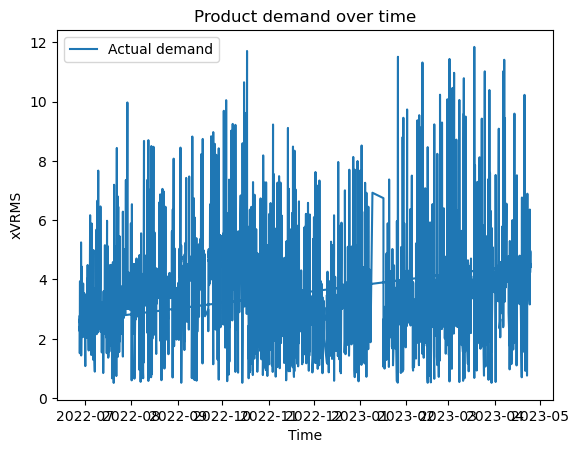

In [57]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot data
plt.plot(slct_df["xVRMS"],label="Actual demand")
plt.title("Product demand over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()

## 3 sigma

In [59]:
process_clm = slct_df["xVRMS"]
process_clm_mean = process_clm.mean()
process_clm_std = process_clm.std()

up_limit = process_clm_mean + 2 * process_clm_std
low_limit = process_clm_mean - 2 * process_clm_std

process_clm_mean,process_clm_std,up_limit,low_limit

(3.522460794410837, 0.9837905419496917, 5.490041878310221, 1.5548797105114534)

In [60]:
df_x=clean_limit(slct_df["xVRMS"],low_limit=low_limit,up_limit=up_limit)

In [62]:
len(df_x)

57011

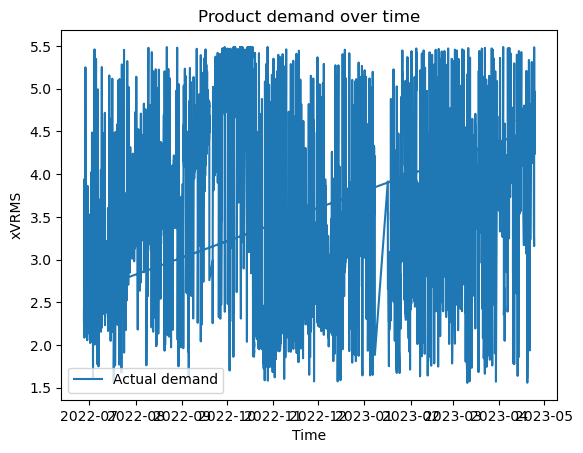

In [65]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Plot data
plt.plot(df_x,label="Actual demand")
plt.title("Product demand over time")
plt.xlabel("Time")
plt.ylabel("xVRMS")
plt.legend()
plt.show()

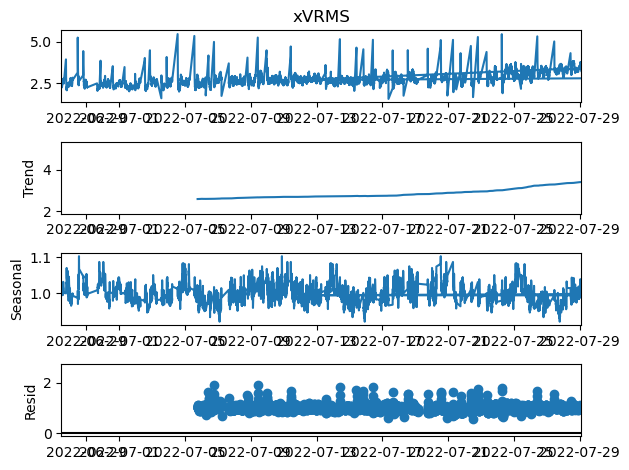

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df_x, model='multiplicative',period=2036)
result.plot()
plt.show()

In [19]:
def df_to_X_y(df, window_size=5):
  """
  Converts a pandas DataFrame to a tuple of NumPy arrays, where X is the input data and y is the target data.

  Args:
    df: A pandas DataFrame.
    window_size: The size of the sliding window.

  Returns:
    A tuple of NumPy arrays, where X is the input data and y is the target data.
  """

  # Convert the DataFrame to a NumPy array.
  df_as_np = df.to_numpy()

  # Create the input and target data.
  X = []
  y = []
  for i in range(len(df_as_np) - window_size):
    row = df_as_np[i:i + window_size]
    X.append(row)
    label = df_as_np[i + window_size]
    y.append(label)

  # Return the input and target data as NumPy arrays.
  return np.array(X), np.array(y)

In [75]:
df_x.head(),type(df_x)

(time
 2022-06-27 11:35:00    2.3975
 2022-06-27 11:40:00    2.3110
 2022-06-27 11:45:00    2.3520
 2022-06-27 11:55:00    2.4500
 2022-06-27 12:00:00    2.3680
 Name: xVRMS, dtype: float64,
 pandas.core.series.Series)

In [67]:
import statsmodels.tsa.arima_model as smt

C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\denem\anaconda3\lib\site-

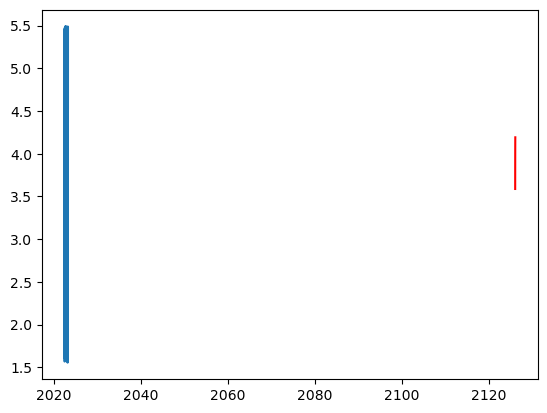

In [80]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Define the ARIMA parameters
p = 2
d = 1
q = 1

# Create the ARIMA model
model = ARIMA(df_x, order=(p, d, q))

# Fit the model to the data
model_fit = model.fit()

# Define the horizon for forecasting
horizon = 10

# Make a forecast
predictions = model_fit.predict(start=len(df_x), end=len(df_x)+horizon, params=model_fit.params)

# Plot the forecast values
plt.plot(df_x)
plt.plot(predictions, color='red')
plt.show()


In [94]:
date=df_x.index[-1]
type(date)

pandas._libs.tslibs.timestamps.Timestamp

In [95]:
date=pd.to_datetime(date)
type(date)

pandas._libs.tslibs.timestamps.Timestamp

In [110]:
df_x.index

DatetimeIndex(['2022-06-27 11:35:00', '2022-06-27 11:40:00',
               '2022-06-27 11:45:00', '2022-06-27 11:50:00',
               '2022-06-27 11:55:00', '2022-06-27 12:00:00',
               '2022-06-27 12:05:00', '2022-06-27 12:10:00',
               '2022-06-27 12:15:00', '2022-06-27 12:20:00',
               ...
               '2023-01-11 09:40:00', '2023-01-11 09:45:00',
               '2023-01-11 09:50:00', '2023-01-11 09:55:00',
               '2023-01-11 10:00:00', '2023-01-11 10:05:00',
               '2023-01-11 10:10:00', '2023-01-11 10:15:00',
               '2023-01-11 10:20:00', '2023-01-11 10:25:00'],
              dtype='datetime64[ns]', length=57011, freq='5T')

In [111]:
idx

DatetimeIndex(['2022-06-27 11:35:00', '2022-06-27 11:40:00',
               '2022-06-27 11:45:00', '2022-06-27 11:50:00',
               '2022-06-27 11:55:00', '2022-06-27 12:00:00',
               '2022-06-27 12:05:00', '2022-06-27 12:10:00',
               '2022-06-27 12:15:00', '2022-06-27 12:20:00',
               ...
               '2023-01-11 09:40:00', '2023-01-11 09:45:00',
               '2023-01-11 09:50:00', '2023-01-11 09:55:00',
               '2023-01-11 10:00:00', '2023-01-11 10:05:00',
               '2023-01-11 10:10:00', '2023-01-11 10:15:00',
               '2023-01-11 10:20:00', '2023-01-11 10:25:00'],
              dtype='datetime64[ns]', length=57011, freq='5T')

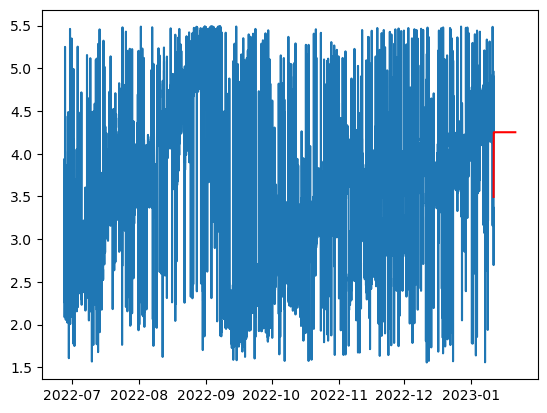

In [142]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Create a new index with a frequency
idx = pd.date_range(start=df_x.index[0], periods=len(df_x), freq='5T')

# Set the new index to the DataFrame
df_x.index = idx

# Define the ARIMA parameters
p = 2
d = 1
q = 1

# Create the ARIMA model
model = ARIMA(df_x, order=(p, d, q))

# Fit the model to the data
model_fit = model.fit()

# Make a forecast for the next 10 days
start_date = df_x.index[-1]
end_date = start_date + pd.DateOffset(days=10)

forecast = model_fit.predict(start=start_date, end=end_date)

# Get the predicted values
predictions = forecast.mean()

# Plot the forecast values
plt.plot(df_x)
plt.plot(forecast, color='red')
plt.show()


In [119]:
predictions

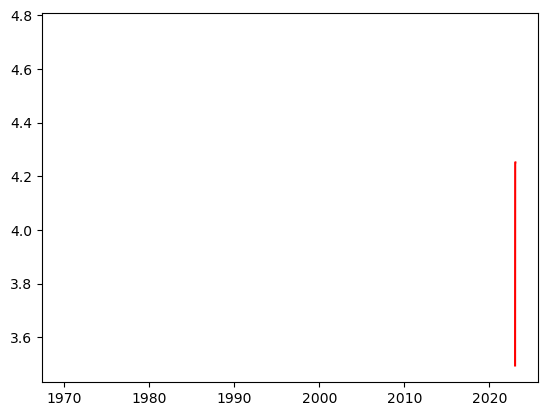

In [136]:
plt.plot(df_x[-100])
plt.plot(forecast, color='red')
plt.show()

In [116]:
df_x.shape

(57011,)